## Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

According to the DBSCAN algorithm, a special label is assigned to each example (data point) using
the following criteria:
* A point is considered a core point if at least a specified number (MinPts) of neighboring points
fall within the specified radius, 𝜀.
* A border point is a point that has fewer neighbors than MinPts within 𝜀 , but lies within the 𝜀𝜀
radius of a core point
* All other points that are neither core nor border points are considered noise points

After labeling the points as core, border, or noise, the DBSCAN algorithm can be summarized in two
simple steps:
1. Form a separate cluster for each core point or connected group of core points. (Core points
are connected if they are no farther away than 𝜀.)
2. Assign each border point to the cluster of its corresponding core point.

In [5]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

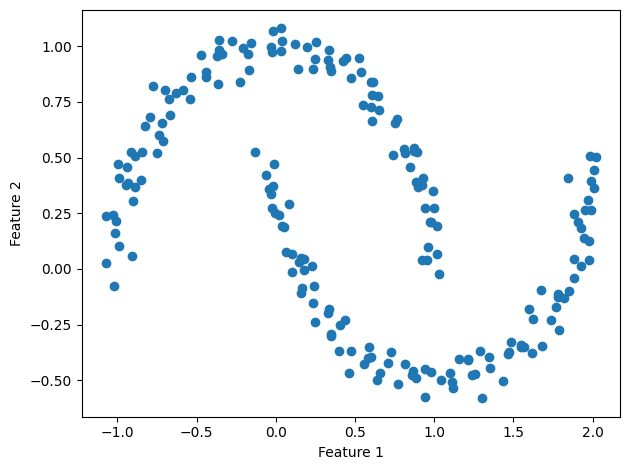

In [4]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

In [6]:
db = DBSCAN(eps = 0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)

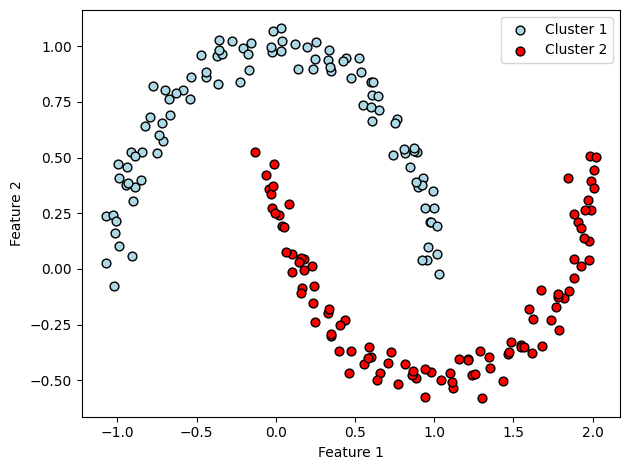

In [7]:
plt.scatter(X[y_db == 0,0],
            X[y_db == 0,1],
            c='lightblue',
            edgecolor='black',
            s=40,
            label='Cluster 1')
plt.scatter(X[y_db == 1,0],
            X[y_db == 1,1],
            c='red',
            edgecolor='black',
            s=40,
            label='Cluster 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

The DBSCAN algorithm can successfully detect the half-moon shapes, which highlights one of the
strengths of DBSCAN—clustering data of arbitrary shapes

However, we should also note some of the disadvantages of DBSCAN. With an increasing number of
features in our dataset—assuming a fixed number of training examples—the negative effect of the
curse of dimensionality increases. This is especially a problem if we are using the Euclidean distance
metric. However, the problem of the curse of dimensionality is not unique to DBSCAN: it also affects
other clustering algorithms that use the Euclidean distance metric, for example, k-means and hier-
archical clustering algorithms. In addition, we have two hyperparameters in DBSCAN (MinPts and 𝜀 )
that need to be optimized to yield good clustering results. Finding a good combination of MinPts and
𝜀𝜀 can be problematic if the density differences in the dataset are relatively large.